In [57]:
import cv2
import numpy as np
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7, 10]

In [58]:
imgFile = r"C:\Users\micha\bilder\england\IMG_1581.JPG"

In [59]:
img1 = cv2.imread(imgFile,  flags=-1)
# img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = np.rot90(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY))
print("dtype: {}\nshape: {}\n max : {}".format(img1.dtype, img1.shape, np.max(img1)))

dtype: uint8
shape: (2592, 1944)
 max : 255


## Histogram & Cumulative Probability##

In [60]:
hi1, x1 = np.histogram(img1, bins=256)
x1 = x1[:-1]
prob_img1 = np.cumsum(hi1)/img1.size

## Mapping Function ##

In [61]:
mapi = 255*prob_img1
mapi = mapi.astype('uint8')

## Apply Mapping to image -> histogram equalization ##

In [62]:
img2 = mapi[img1]
hi2, x2 = np.histogram(img2, bins=256)
x2 = x2[:-1]
prob_img2 = np.cumsum(hi2)/img2.size

## histogram after equalisation##

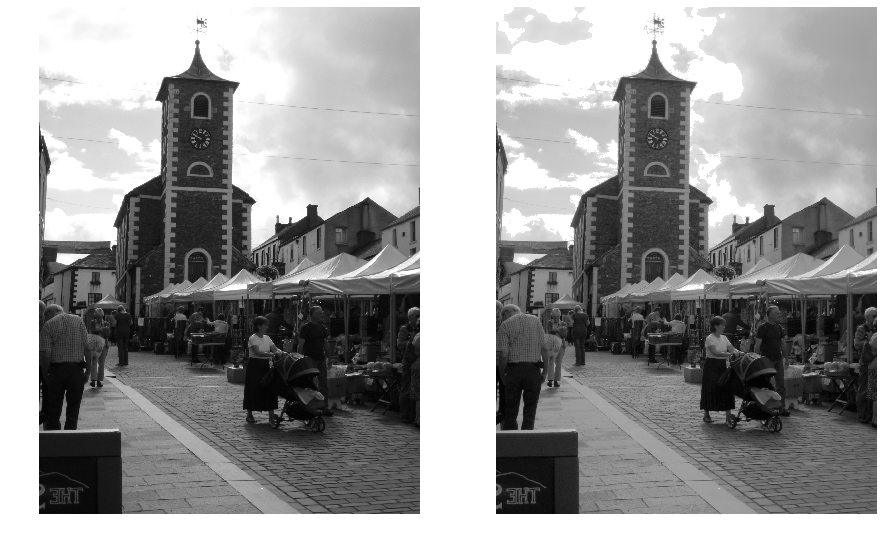

In [63]:
fig1 = plt.figure(1, figsize=(15,20))
ax1 = fig1.add_subplot(1,2,1)
ax1.axis('off')
ax1.imshow(img1, origin='center', cmap='gray')
ax1 = fig1.add_subplot(1,2,2)
ax1.axis('off')
ax1.imshow(img2, origin='center', cmap='gray')

Text(0.5, 0, 'intensity (original image)')

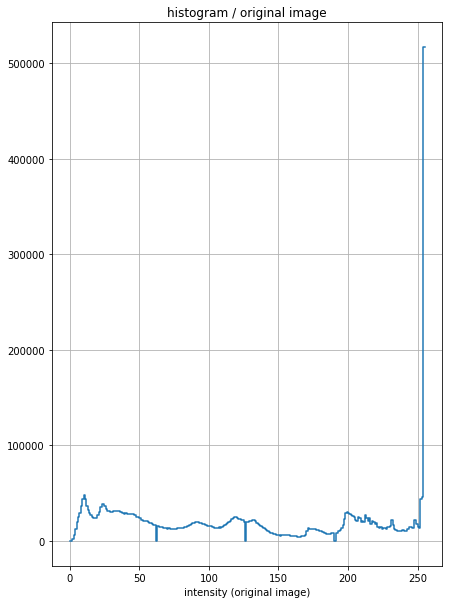

In [64]:
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1,1,1)
ax2.grid()
ax2.axis('on')
ax2.plot(hi1, drawstyle='steps')
ax2.set_title('histogram / original image')
ax2.set_xlabel('intensity (original image)')

Text(0, 0.5, 'probability(I)')

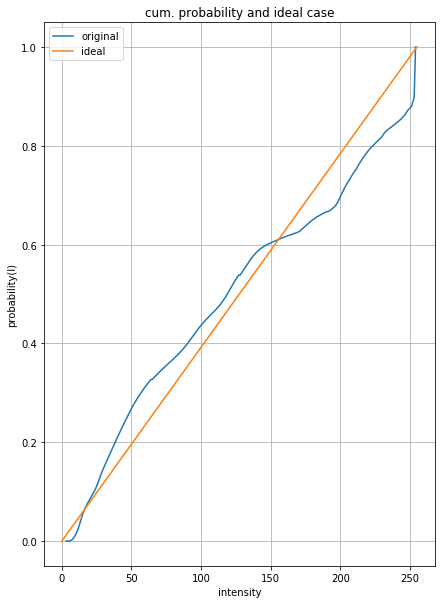

In [65]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)
ax3.grid()
ax3.axis('on')
ax3.plot(x1, prob_img1, label='original')
ax3.plot([0, 255], [0, 1], label='ideal')
ax3.set_title('cum. probability and ideal case')
ax3.legend()
ax3.set_xlabel('intensity')
ax3.set_ylabel('probability(I)')

Text(0, 0.5, 'intensity (equalised)')

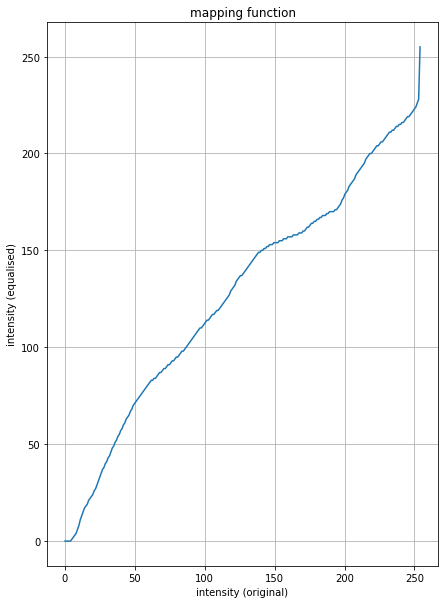

In [66]:
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(x2, mapi)
ax4.grid()
ax4.axis('on')
ax4.set_title('mapping function')
ax4.set_xlabel('intensity (original)')
ax4.set_ylabel('intensity (equalised)')

Text(0, 0.5, 'prob(I)')

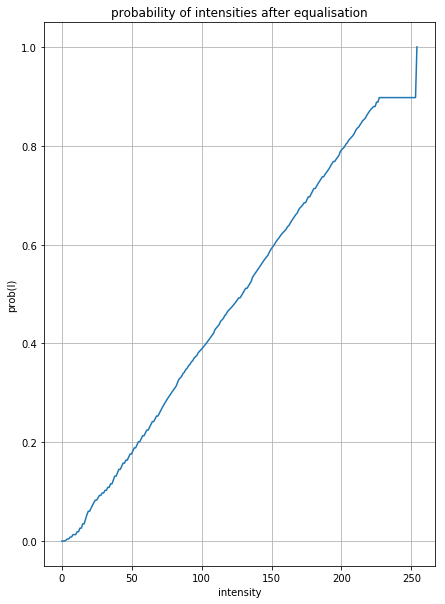

In [67]:
fig5 = plt.figure(5)
ax5 = fig5.add_subplot(1,1,1)
ax5.grid()
ax5.axis('on')
ax5.plot(x2, prob_img2)
ax5.set_title('probability of intensities after equalisation')
ax5.set_xlabel('intensity')
ax5.set_ylabel('prob(I)')